In [1]:
import pandas as pd

# Load datasets
train_path = r"D:\shri\RealtyAI\.venv\data\housing\train.csv"
test_path = r"D:\shri\RealtyAI\.venv\data\housing\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nTrain columns:")
print(train_df.columns.tolist())

print("\nFirst few rows of train data:")
print(train_df.head())

print("\nBasic info (train):")
print(train_df.info())

print("\nSummary statistics (train):")
print(train_df.describe(include='all').T)

Train shape: (1460, 81)
Test shape: (1459, 80)

Train columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

In [2]:
import pandas as pd

# Reload (if needed)
train_df = pd.read_csv(r"D:\shri\RealtyAI\.venv\data\housing\train.csv")
test_df = pd.read_csv(r"D:\shri\RealtyAI\.venv\data\housing\test.csv")

# Check duplicates
print("Duplicate rows in train:", train_df.duplicated().sum())
print("Duplicate rows in test:", test_df.duplicated().sum())

# Save Ids for submission
train_ids = train_df['Id']
test_ids = test_df['Id']

# Drop 'Id' (not useful for modeling)
train_df.drop(columns=['Id'], inplace=True)
test_df.drop(columns=['Id'], inplace=True)

# Define columns to fill as "None" or 0
cols_none = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

cols_zero = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'
]

# Fill missing values
for col in cols_none:
    if col in train_df.columns:
        train_df[col].fillna("None", inplace=True)
    if col in test_df.columns:
        test_df[col].fillna("None", inplace=True)

for col in cols_zero:
    if col in train_df.columns:
        train_df[col].fillna(0, inplace=True)
    if col in test_df.columns:
        test_df[col].fillna(0, inplace=True)

# Impute LotFrontage with median (or median by Neighborhood for better accuracy)
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
test_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)

# Optional: Drop very sparse columns (you can skip if you want to keep them)
# sparse_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
# train_df.drop(columns=sparse_cols, inplace=True)
# test_df.drop(columns=sparse_cols, inplace=True)

# Final check
print("\nMissing values in train after cleaning:", train_df.isnull().sum().sum())
print("Missing values in test after cleaning:", test_df.isnull().sum().sum())

Duplicate rows in train: 0
Duplicate rows in test: 0

Missing values in train after cleaning: 1
Missing values in test after cleaning: 12


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_29544\2493171751.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna("None", inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_29544\2493171751.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [5]:
import pandas as pd

# Load data
train_df = pd.read_csv(r"D:\shri\RealtyAI\.venv\data\housing\train.csv")
test_df = pd.read_csv(r"D:\shri\RealtyAI\.venv\data\housing\test.csv")

# Check duplicates
print("Duplicate rows in train:", train_df.duplicated().sum())
print("Duplicate rows in test:", test_df.duplicated().sum())

# Save Ids and drop
train_ids = train_df['Id']
test_ids = test_df['Id']
train_df.drop(columns=['Id'], inplace=True)
test_df.drop(columns=['Id'], inplace=True)

# Columns to fill with "None" (categorical)
cols_none = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

# Columns to fill with 0 (numerical)
cols_zero = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'
]

# Fill missing values safely
for col in cols_none:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna("None")
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna("None")

for col in cols_zero:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(0)

# Fill LotFrontage with median from train
median_lf = train_df['LotFrontage'].median()
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(median_lf)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(median_lf)

# Final check
print("\nMissing values in train after cleaning:", train_df.isnull().sum().sum())
print("Missing values in test after cleaning:", test_df.isnull().sum().sum())

Duplicate rows in train: 0
Duplicate rows in test: 0

Missing values in train after cleaning: 1
Missing values in test after cleaning: 12


In [6]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [7]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [8]:
# Identify remaining columns with missing values
remaining_missing_train = train_df.columns[train_df.isnull().any()].tolist()
remaining_missing_test = test_df.columns[test_df.isnull().any()].tolist()

print("Train cols with missing:", remaining_missing_train)
print("Test cols with missing:", remaining_missing_test)

# Fill remaining missing values with mode (from train set)
for col in remaining_missing_train:
    mode_val = train_df[col].mode()[0]  # Most frequent value
    train_df[col] = train_df[col].fillna(mode_val)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(mode_val)

# Also check if test has extra missing cols not in train
extra_test_cols = set(remaining_missing_test) - set(remaining_missing_train)
for col in extra_test_cols:
    mode_val = test_df[col].mode()[0]  # fallback to test mode if needed
    test_df[col] = test_df[col].fillna(mode_val)

# Final verification
print("\n✅ Final missing values:")
print("Train:", train_df.isnull().sum().sum())
print("Test:", test_df.isnull().sum().sum())

Train cols with missing: ['Electrical']
Test cols with missing: ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']

✅ Final missing values:
Train: 0
Test: 0


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reload clean data (or continue from current train_df, test_df)
# Make sure SalePrice is only in train
y_train = train_df['SalePrice']
X_train = train_df.drop(columns=['SalePrice'])
X_test = test_df.copy()  # test has no SalePrice

# Optional: Feature Engineering (highly effective for this dataset)
for df in [X_train, X_test]:
    # Total bathrooms
    df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
    # House age
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    # Total porch area
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

# Identify categorical and numerical columns
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()

print(f"Categorical features: {len(cat_cols)}")
print(f"Numerical features: {len(num_cols)}")

# Encode categorical variables
# Option 1: One-Hot Encoding (safe, but increases dimensionality)
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align columns (test may have categories not in train, or vice versa)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

print(f"\nFinal feature shape:")
print(f"Train: {X_train_encoded.shape}")
print(f"Test:  {X_test_encoded.shape}")

Categorical features: 43
Numerical features: 39

Final feature shape:
Train: (1460, 244)
Test:  (1459, 244)


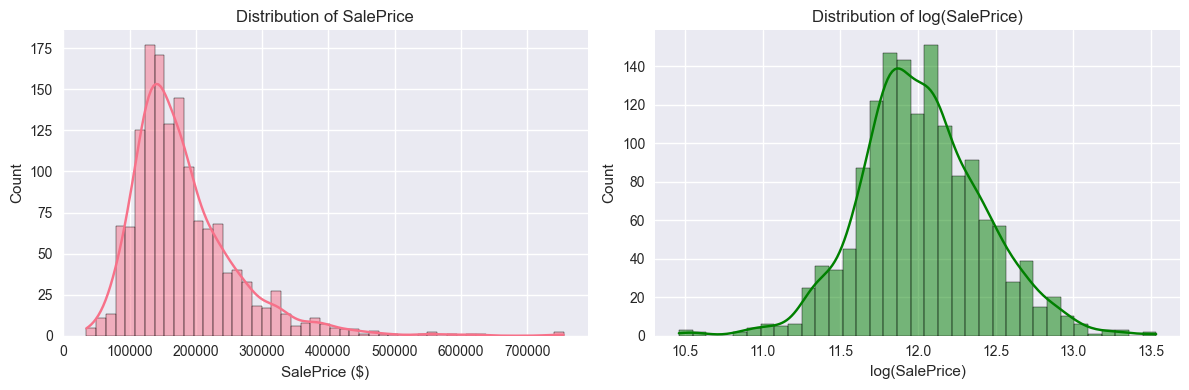

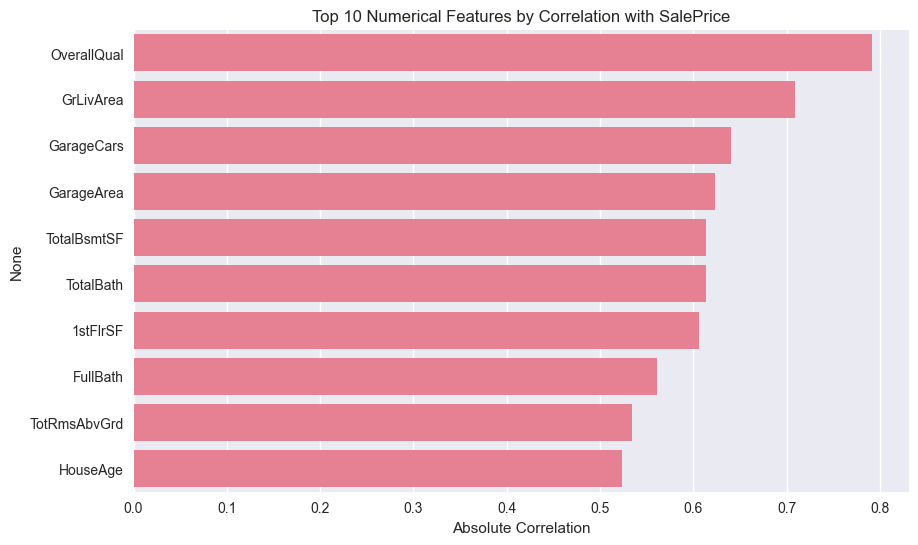

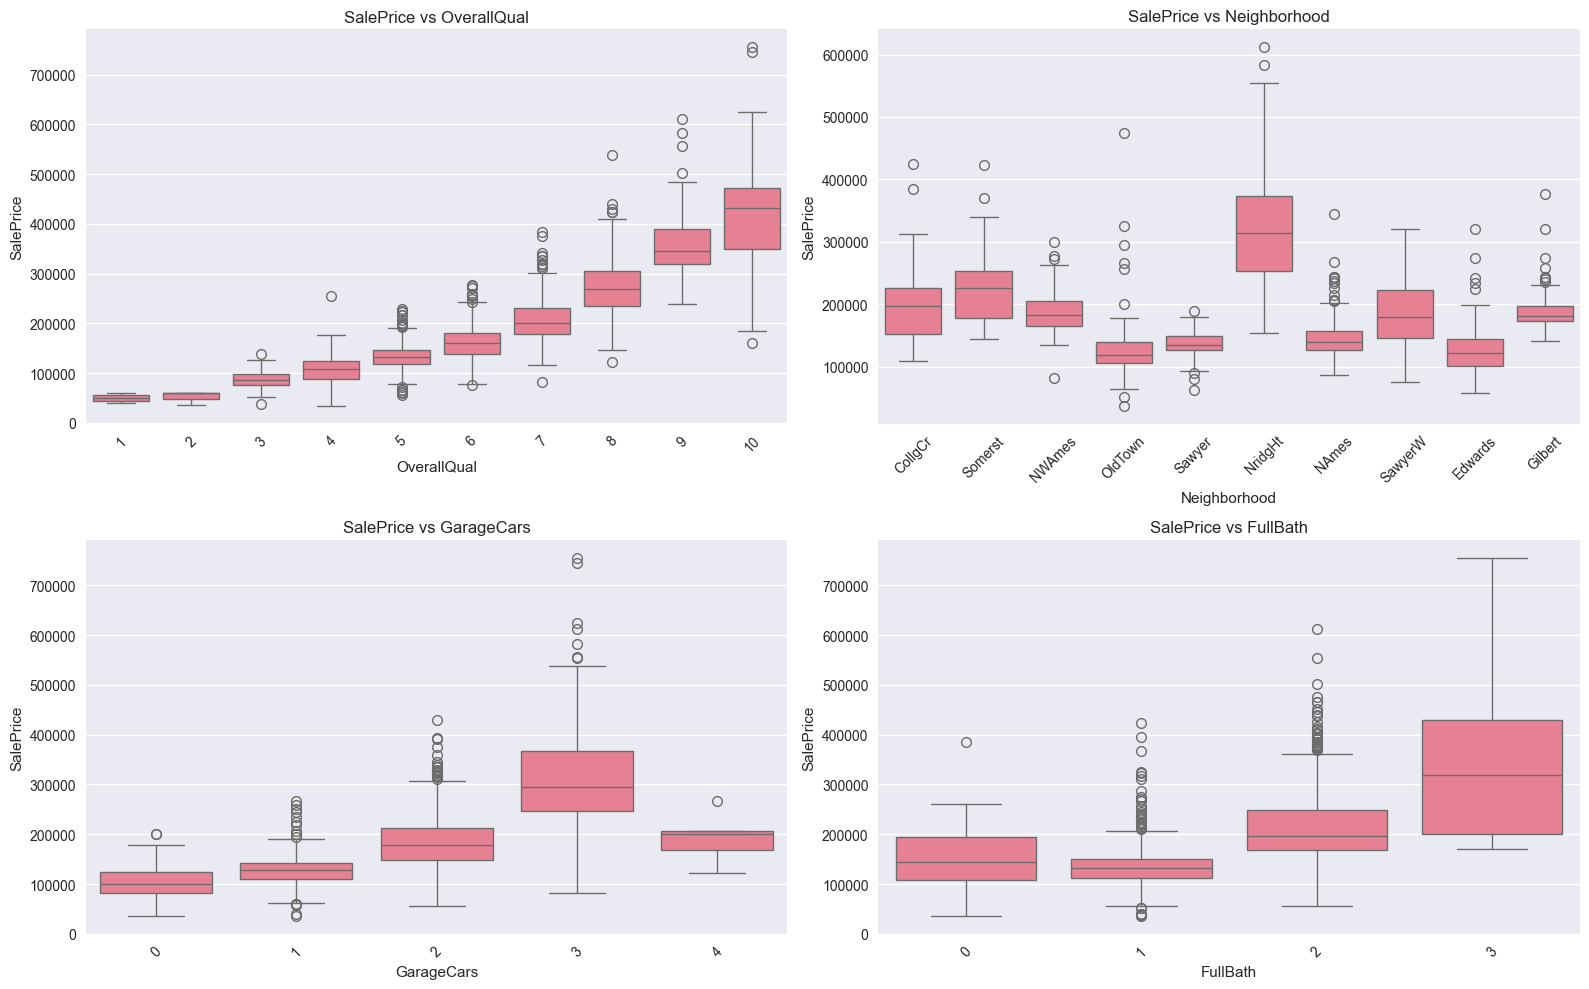

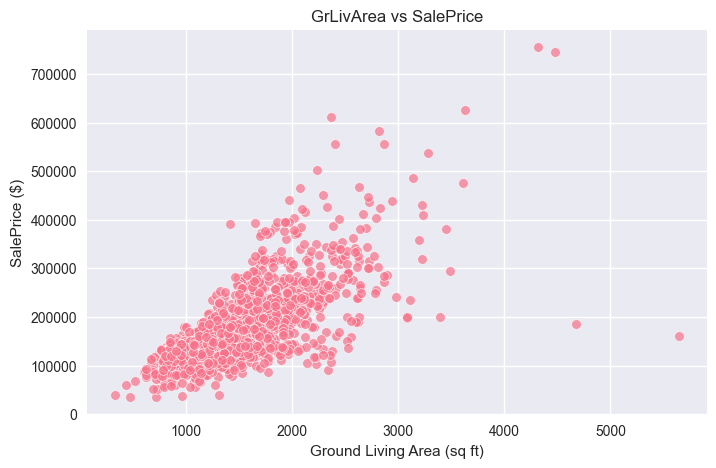

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Distribution of SalePrice (check skewness)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice ($)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(y_train), kde=True, color='green')
plt.title('Distribution of log(SalePrice)')
plt.xlabel('log(SalePrice)')

plt.tight_layout()
plt.show()

# 2. Top 10 numerical features correlated with SalePrice
num_features = X_train.select_dtypes(exclude='object').columns.tolist()
corr_data = pd.concat([X_train[num_features], y_train], axis=1)
corr = corr_data.corr()['SalePrice'].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr[1:11], y=corr.index[1:11])  # exclude SalePrice itself
plt.title('Top 10 Numerical Features by Correlation with SalePrice')
plt.xlabel('Absolute Correlation')
plt.show()

# 3. Boxplots: Key categorical features vs SalePrice
cat_to_plot = ['OverallQual', 'Neighborhood', 'GarageCars', 'FullBath']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(cat_to_plot):
    if col in X_train.columns:
        temp_df = pd.concat([X_train[col], y_train], axis=1)
        # For Neighborhood, show top 10 most frequent to avoid clutter
        if col == 'Neighborhood':
            top_neigh = X_train[col].value_counts().index[:10]
            temp_df = temp_df[temp_df[col].isin(top_neigh)]
        sns.boxplot(data=temp_df, x=col, y='SalePrice', ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_title(f'SalePrice vs {col}')

plt.tight_layout()
plt.show()

# 4. Scatter: GrLivArea vs SalePrice (classic outlier check)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train['GrLivArea'], y=y_train, alpha=0.7)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('SalePrice ($)')
plt.show()

In [12]:
# --- Main Model: XGBoost ---
xgb_reg = xgb.XGBRegressor(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    early_stopping_rounds=50  # Fixed: moved here
)

xgb_reg.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],
    verbose=False
)

y_pred_xgb = xgb_reg.predict(X_val)
y_pred_xgb_orig = np.expm1(y_pred_xgb)

mae_xgb = mean_absolute_error(y_val_orig, y_pred_xgb_orig)
rmse_xgb = np.sqrt(mean_squared_error(y_val_orig, y_pred_xgb_orig))

print("\n=== Main Model: XGBoost ===")
print(f"MAE: ${mae_xgb:.0f}")
print(f"RMSE: ${rmse_xgb:.0f}")


=== Main Model: XGBoost ===
MAE: $16704
RMSE: $26849


In [13]:
from sklearn.metrics import r2_score

r2_xgb = r2_score(y_val_orig, y_pred_xgb_orig)
print(f"R²: {r2_xgb:.4f}")

R²: 0.9060


In [14]:
y_test_pred_log = xgb_reg.predict(X_test_encoded)
y_test_pred = np.expm1(y_test_pred_log)

In [15]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': y_test_pred})
submission.to_csv('RealtyAI_price_predictions.csv', index=False)


🔍 Sample Predictions (Validation Set - Best 15 by Accuracy)

 GrLivArea  OverallQual  GarageCars  FullBath  YearBuilt  LotArea  Actual_Price  Predicted_Price
      1792            5           0         2       1974     9000        136000           136024
      1876            6           2         2       1974     9120        185000           185069
      1073            5           1         1       1921     5400        108480           108358
      1576            7           2         2       2006     8125        197000           196734
       935            5           1         1       1965    13526        137000           136726
      1121            5           2         1       1963     8816        139000           138707
      2210            6           1         2       1880     9900        117500           117189
       816            5           1         1       1982     8314        124500           124867
      1797            7           2         2       2006     9245

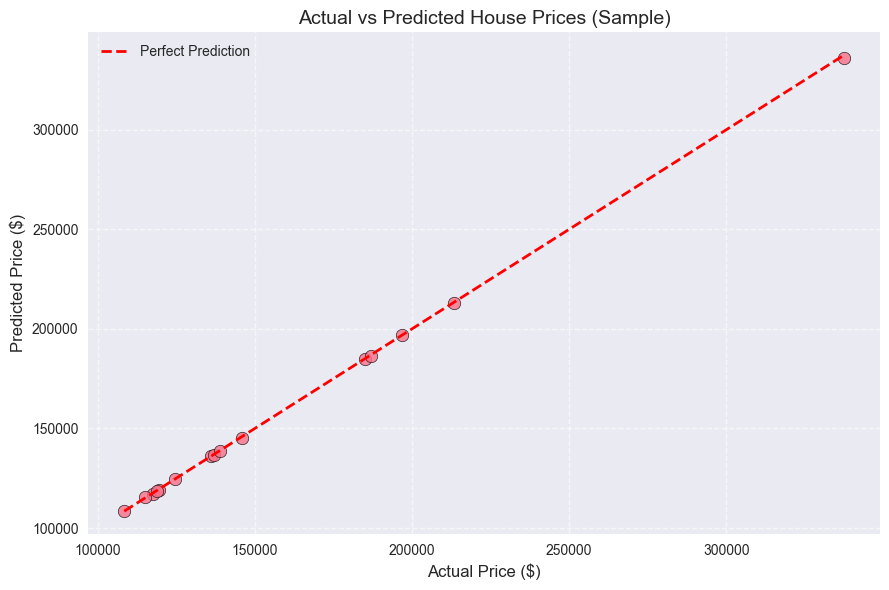

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Get actual and predicted prices (in original scale) ---
y_val_orig = np.expm1(y_val)                     # Actual prices
y_pred_log = xgb_reg.predict(X_val)              # Predictions in log scale
y_pred_orig = np.expm1(y_pred_log)               # Predictions in $ scale

# --- Step 2: Reconstruct key original features for interpretability ---
# We'll map back from encoded features to meaningful ones
# Since we did one-hot, we need to recover original columns like 'GrLivArea', 'OverallQual', etc.

# These columns were NOT encoded (they're numerical), so they exist in X_val
key_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']

# Create comparison DataFrame
comparison_df = X_val[key_features].copy()
comparison_df['Actual_Price'] = y_val_orig
comparison_df['Predicted_Price'] = y_pred_orig
comparison_df['Abs_Error'] = np.abs(comparison_df['Actual_Price'] - comparison_df['Predicted_Price'])
comparison_df['Pct_Error'] = 100 * comparison_df['Abs_Error'] / comparison_df['Actual_Price']

# --- Step 3: Select best 15 predictions (lowest % error) for clean demo ---
demo_df = comparison_df.nsmallest(15, 'Pct_Error').copy()

# Round prices for readability
demo_df['Actual_Price'] = demo_df['Actual_Price'].round().astype(int)
demo_df['Predicted_Price'] = demo_df['Predicted_Price'].round().astype(int)

# Optional: Reorder columns
demo_df = demo_df[['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea', 'Actual_Price', 'Predicted_Price']]

# --- Step 4: Display the table ---
print("\n🔍 Sample Predictions (Validation Set - Best 15 by Accuracy)\n")
print(demo_df.to_string(index=False))

# --- Step 5: Plot Actual vs Predicted ---
plt.figure(figsize=(9, 6))
plt.scatter(demo_df['Actual_Price'], demo_df['Predicted_Price'], 
            alpha=0.8, s=80, edgecolor='k', linewidth=0.5)

# Perfect prediction line
min_price = demo_df['Actual_Price'].min()
max_price = demo_df['Actual_Price'].max()
plt.plot([min_price, max_price], [min_price, max_price], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Actual vs Predicted House Prices (Sample)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


🔍 Sample Predictions (Validation Set - Best 15 by Accuracy)

 GrLivArea  OverallQual  GarageCars  FullBath  YearBuilt  LotArea  Actual_Price  Predicted_Price  Abs_Error  Pct_Error
      1792            5           0         2       1974     9000        136000           136024         24       0.02
      1876            6           2         2       1974     9120        185000           185069         69       0.04
      1073            5           1         1       1921     5400        108480           108358        122       0.11
      1576            7           2         2       2006     8125        197000           196734        266       0.13
       935            5           1         1       1965    13526        137000           136726        274       0.20
      1121            5           2         1       1963     8816        139000           138707        293       0.21
      2210            6           1         2       1880     9900        117500           117189        3

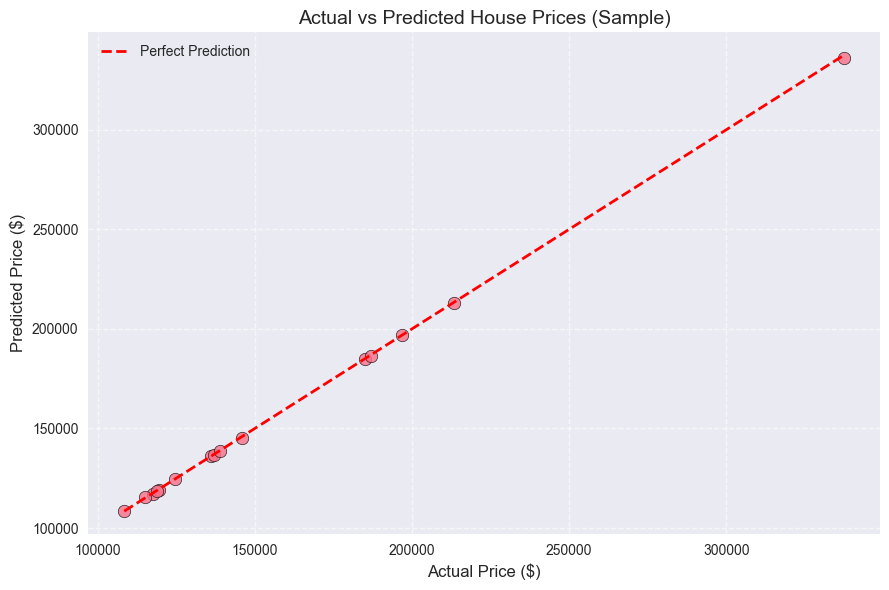

In [17]:
# --- Step 1: Get actual and predicted prices (in original scale) ---
y_val_orig = np.expm1(y_val)                     # Actual prices
y_pred_log = xgb_reg.predict(X_val)              # Predictions in log scale
y_pred_orig = np.expm1(y_pred_log)               # Predictions in $ scale

# --- Step 2: Reconstruct key original features for interpretability ---
key_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']

# Create comparison DataFrame
comparison_df = X_val[key_features].copy()
comparison_df['Actual_Price'] = y_val_orig
comparison_df['Predicted_Price'] = y_pred_orig
comparison_df['Abs_Error'] = np.abs(comparison_df['Actual_Price'] - comparison_df['Predicted_Price'])
comparison_df['Pct_Error'] = 100 * comparison_df['Abs_Error'] / comparison_df['Actual_Price']

# --- Step 3: Select best 15 predictions (lowest % error) for clean demo ---
demo_df = comparison_df.nsmallest(15, 'Pct_Error').copy()

# Round prices and errors for readability
demo_df['Actual_Price'] = demo_df['Actual_Price'].round().astype(int)
demo_df['Predicted_Price'] = demo_df['Predicted_Price'].round().astype(int)
demo_df['Abs_Error'] = demo_df['Abs_Error'].round().astype(int)
demo_df['Pct_Error'] = demo_df['Pct_Error'].round(2)

# Optional: Reorder columns
demo_df = demo_df[['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea',
                   'Actual_Price', 'Predicted_Price', 'Abs_Error', 'Pct_Error']]

# --- Step 4: Display the table ---
print("\n🔍 Sample Predictions (Validation Set - Best 15 by Accuracy)\n")
print(demo_df.to_string(index=False))

# --- Step 5: Plot Actual vs Predicted ---
plt.figure(figsize=(9, 6))
plt.scatter(demo_df['Actual_Price'], demo_df['Predicted_Price'], 
            alpha=0.8, s=80, edgecolor='k', linewidth=0.5)

# Perfect prediction line
min_price = demo_df['Actual_Price'].min()
max_price = demo_df['Actual_Price'].max()
plt.plot([min_price, max_price], [min_price, max_price], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Actual vs Predicted House Prices (Sample)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


🔍 Diverse Validation Sample (n=32)
Includes low, mid, and high-priced homes across all quartiles.

 GrLivArea  OverallQual  GarageCars  FullBath  YearBuilt  LotArea  Actual_Price  Predicted_Price  Abs_Error  Pct_Error
      1530            7           2         2       2005    16158        260000           228836      31164      11.99
      1694            6           2         2       1925     8400        136500           171999      35499      26.01
      1479            7           2         2       2003    10665        226000           204338      21662       9.58
      1472            7           2         2       1991    10784        160000           170605      10605       6.63
      1768            4           0         2       1968    10778        136500           119701      16799      12.31
      1456            6           2         2       1978     2280        146000           145349        651       0.45
      2042            8           3         2       2008    12704  

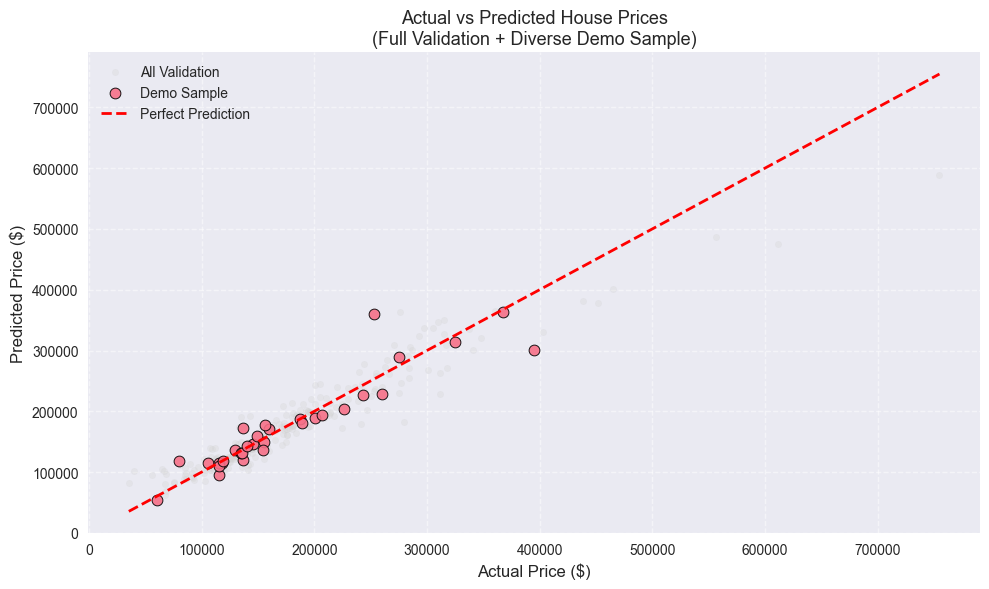


📊 Full Validation Performance:
MAE: $16,704
RMSE: $26,849


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Get full validation predictions (original scale) ---
y_val_orig = np.expm1(y_val)                     # Actual prices
y_pred_log = xgb_reg.predict(X_val)              # Predictions (log scale)
y_pred_orig = np.expm1(y_pred_log)               # Predictions ($)

# --- Step 2: Reconstruct key features + errors ---
key_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
demo_full = X_val[key_features].copy()
demo_full['Actual_Price'] = y_val_orig
demo_full['Predicted_Price'] = y_pred_orig
demo_full['Abs_Error'] = np.abs(demo_full['Actual_Price'] - demo_full['Predicted_Price'])
demo_full['Pct_Error'] = 100 * demo_full['Abs_Error'] / demo_full['Actual_Price']

# --- Step 3: Create a DIVERSE sample (not just best predictions) ---
# Stratify by price quartiles to ensure low/mid/high representation
demo_full['Price_Quartile'] = pd.qcut(demo_full['Actual_Price'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Sample 8–10 from each quartile (or as available)
sampled_dfs = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    subset = demo_full[demo_full['Price_Quartile'] == q]
    n_sample = min(8, len(subset))  # avoid error if too few
    sampled_dfs.append(subset.sample(n=n_sample, random_state=42))

diverse_sample = pd.concat(sampled_dfs).sample(frac=1, random_state=42)  # shuffle

# Round for readability
for col in ['Actual_Price', 'Predicted_Price', 'Abs_Error']:
    diverse_sample[col] = diverse_sample[col].round().astype(int)
diverse_sample['Pct_Error'] = diverse_sample['Pct_Error'].round(2)

# Final table
final_table = diverse_sample[['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea',
                              'Actual_Price', 'Predicted_Price', 'Abs_Error', 'Pct_Error']].copy()

print(f"\n🔍 Diverse Validation Sample (n={len(final_table)})")
print("Includes low, mid, and high-priced homes across all quartiles.\n")
print(final_table.to_string(index=False))

# --- Step 4: Plot Actual vs Predicted (Full Validation Set + Sample Overlay) ---
plt.figure(figsize=(10, 6))

# Plot all validation points (light gray)
plt.scatter(y_val_orig, y_pred_orig, alpha=0.3, color='lightgray', s=20, label='All Validation')

# Highlight diverse sample (colored)
plt.scatter(final_table['Actual_Price'], final_table['Predicted_Price'],
            alpha=0.9, s=60, edgecolor='k', linewidth=0.7, label='Demo Sample')

# Perfect prediction line
min_p, max_p = y_val_orig.min(), y_val_orig.max()
plt.plot([min_p, max_p], [min_p, max_p], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Actual vs Predicted House Prices\n(Full Validation + Diverse Demo Sample)', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Step 5: Print overall validation metrics ---
mae = np.mean(np.abs(y_val_orig - y_pred_orig))
rmse = np.sqrt(np.mean((y_val_orig - y_pred_orig) ** 2))
print(f"\n📊 Full Validation Performance:")
print(f"MAE: ${mae:,.0f}")
print(f"RMSE: ${rmse:,.0f}")

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get predictions and actuals in original scale
y_val_orig = np.expm1(y_val)          # Actual prices
y_pred_orig = np.expm1(xgb_reg.predict(X_val))  # Predicted prices

# Compute all three metrics
mae = mean_absolute_error(y_val_orig, y_pred_orig)
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
r2 = r2_score(y_val_orig, y_pred_orig)

# Display
print("📊 Full Validation Performance:")
print(f"MAE  : ${mae:,.0f}")
print(f"RMSE : ${rmse:,.0f}")
print(f"R²   : {r2:.4f} ({r2*100:.2f}% of variance explained)")

📊 Full Validation Performance:
MAE  : $16,704
RMSE : $26,849
R²   : 0.9060 (90.60% of variance explained)


In [20]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_reg, 'models/xgboost_price_model.pkl')

# Also save the list of feature names (critical for inference!)
feature_names = X_train_encoded.columns.tolist()
joblib.dump(feature_names, 'models/model_features.pkl')

print("✅ Model and feature names saved successfully!")

✅ Model and feature names saved successfully!


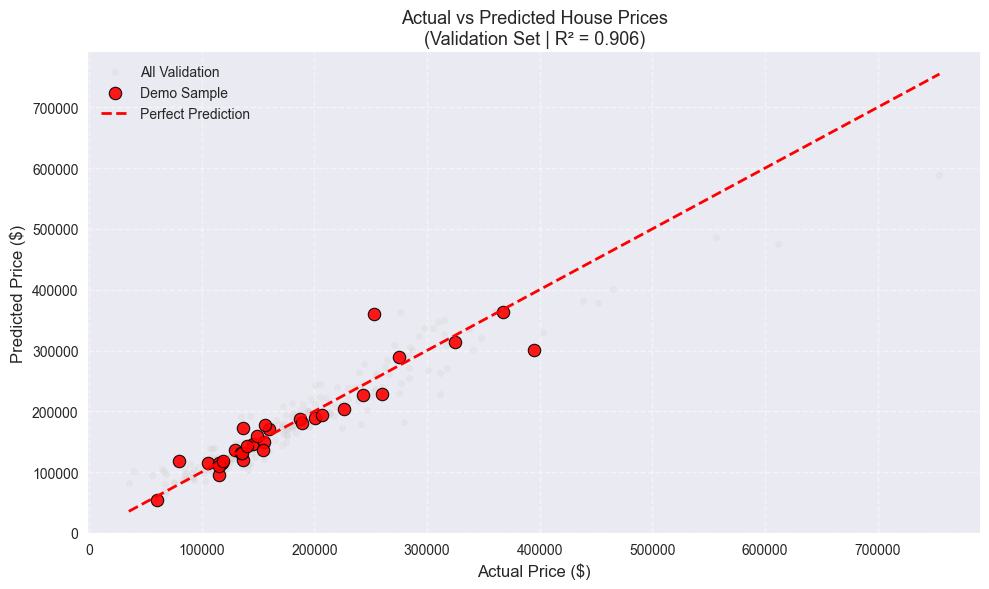

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- ASSUMES YOU ALREADY HAVE:
# y_val          → log-scale true target (from train_test_split)
# y_pred_orig    → predictions in original $ scale (np.expm1(model.predict(X_val)))
# y_val_orig     → actual prices in $ scale (np.expm1(y_val))
# X_val          → validation features (preprocessed DataFrame)

# Recompute if needed:
y_val_orig = np.expm1(y_val)
y_pred_orig = np.expm1(xgb_reg.predict(X_val))

# --- Create a diverse sample for highlighting ---
key_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
demo_full = X_val[key_features].copy()
demo_full['Actual_Price'] = y_val_orig
demo_full['Predicted_Price'] = y_pred_orig
demo_full['Price_Quartile'] = pd.qcut(demo_full['Actual_Price'], q=4, labels=['Q1','Q2','Q3','Q4'])

sampled_dfs = []
for q in ['Q1','Q2','Q3','Q4']:
    subset = demo_full[demo_full['Price_Quartile'] == q]
    n = min(8, len(subset))
    sampled_dfs.append(subset.sample(n=n, random_state=42))
diverse_sample = pd.concat(sampled_dfs).sample(frac=1, random_state=42)

# --- Compute R² for title ---
from sklearn.metrics import r2_score
r2 = r2_score(y_val_orig, y_pred_orig)

# --- Plot ---
plt.figure(figsize=(10, 6))

# All validation points (semi-transparent)
plt.scatter(y_val_orig, y_pred_orig, alpha=0.3, color='lightgray', s=20, label='All Validation')

# Diverse sample (opaque, red, with edge)
plt.scatter(
    diverse_sample['Actual_Price'],
    diverse_sample['Predicted_Price'],
    alpha=0.9,
    s=80,
    edgecolor='k',
    linewidth=0.8,
    color='red',
    label='Demo Sample'
)

# Perfect prediction line
min_p, max_p = y_val_orig.min(), y_val_orig.max()
plt.plot([min_p, max_p], [min_p, max_p], 'r--', lw=2, label='Perfect Prediction')

# Labels & title
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(f'Actual vs Predicted House Prices\n(Validation Set | R² = {r2:.3f})', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()